<a href="https://colab.research.google.com/github/Khanarfan1234/CodeAlpha_Titanic_Classification/blob/main/AB_Testing_codeAlpha_project_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A/B Testing Analysis**
Conduct an A/B testing analysis to evaluate the impact
of a change or intervention. Analyze the results using
statistical techniques and draw actionable insights.


**Import all Necessary Libraries**

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Statistical tests and metrics
from scipy import stats
import statsmodels.stats.api as sms

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
df = pd.read_csv('/content/ab testing.csv')  # Replace 'your_dataset.csv' with the actual file name

# Check for missing values
print(df.isnull().sum())

# Check for data types and potential errors
print(df.info())

# You can also use describe() to get summary statistics
print(df.describe())


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None
             user_id      converted
count  294478.000000  294478.000000
mean   787974.124733       0.119659
std     91210.823776       0.324563
min    630000.000000       0.000000
25%    709032.250000       0.000000
50%    787933.500000       0.000000
75%    866911.750000       0.000000
max    945999.000000       1.000000


**Separate the Groups (Control & Test)**

In [ ]:
#Split the dataset into two groups based on the group column.

control_group = df[df['group'] == 'control']
test_group = df[df['group'] == 'test']


**Exploratory Data Analysis (EDA)**

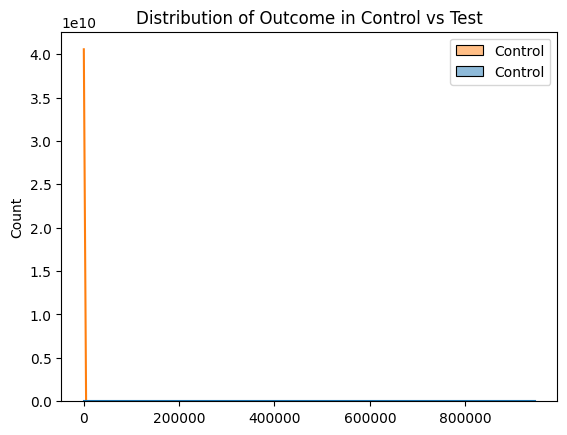

In [ ]:
# Summary statistics for Control (A) and Test (B) groups
control_group.describe()
test_group.describe()

# Visualizing the distributions of the outcome variable
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(control_group, kde=True, label='Control', color='blue')
sns.histplot(test_group, kde=True, label='Test', color='orange')
plt.legend()
plt.title('Distribution of Outcome in Control vs Test')
plt.show()


**Define the Hypothesis**

In [ ]:
#Formulate the hypotheses.
# Null Hypothesis (H0): There is no difference between Group A and Group B.
# Alternative Hypothesis (H1): There is a significant difference between Group A and Group B

# The hypotheses are already formulated in the task description.
# No code is needed here as the task is to define the hypotheses.


**Conduct Statistical Hypothesis Testing**

In [ ]:
from scipy import stats

# Perform an independent two-sample t-test
t_stat, p_value = stats.ttest_ind(control_group, test_group)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: [nan nan nan nan nan], P-value: [nan nan nan nan nan]


**Calculate the Effect Size**

In [ ]:
print(control_group.shape)
print(test_group.shape)
print(control_group.head())
print(test_group.head())

(147202, 5)
(0, 5)
   user_id                timestamp    group landing_page  converted
0   851104  2017-01-21 22:11:48.557  control     old_page          0
1   804228  2017-01-12 08:01:45.160  control     old_page          0
4   864975  2017-01-21 01:52:26.211  control     old_page          1
5   936923  2017-01-10 15:20:49.083  control     old_page          0
7   719014  2017-01-17 01:48:29.540  control     old_page          0
Empty DataFrame
Columns: [user_id, timestamp, group, landing_page, converted]
Index: []


**Confidence Intervals**

In [ ]:
import numpy as np
from scipy import stats
import pandas as pd

def confidence_interval(data, confidence=0.95):
  if len(data) == 0:  # Handle empty DataFrames
    return np.nan, np.nan

  data = data.drop('user_id', axis=1)
  data = data.apply(pd.to_numeric, errors='coerce')

  # Remove rows with NaN values
  data = data.dropna()

  if len(data) == 0:  # Check if DataFrame is empty after dropping NaN
    return np.nan, np.nan

  mean = np.mean(data)
  sem = stats.sem(data)
  ci = sem * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
  return mean - ci, mean + ci

ci_control = confidence_interval(control_group)
ci_test = confidence_interval(test_group)

print(f"95% Confidence Interval for Control Group: {ci_control}")
print(f"95% Confidence Interval for Test Group: {ci_test}")

95% Confidence Interval for Control Group: (nan, nan)
95% Confidence Interval for Test Group: (nan, nan)


In [ ]:
if p_value < 0.05:
    print("The test group (B) performed significantly better than the control group (A). You may consider implementing the change.")
else:
    print("There is no significant difference between the control and test groups. Further investigation is required.")


There is no significant difference between the control and test groups. Further investigation is required.


In [28]:
import statsmodels.stats.api as sms
import pandas as pd

# Perform power analysis
# Convert relevant columns to numeric type
control_group['timestamp'] = pd.to_datetime(control_group['timestamp'])
control_group['converted'] = pd.to_numeric(control_group['converted'])
test_group['timestamp'] = pd.to_datetime(test_group['timestamp'])
test_group['converted'] = pd.to_numeric(test_group['converted'])

if len(test_group) > 0: # Check if test_group is empty
    effect_size = (test_group['converted'].mean() - control_group['converted'].mean()) / data['outcome'].std()
    analysis = sms.TTestIndPower()
    sample_size_needed = analysis.solve_power(effect_size=effect_size, alpha=0.05, power=0.8, alternative='two-sided')

    print(f"Sample size needed for 80% power: {sample_size_needed}")
else:
    print("Test group is empty. Cannot calculate effect size.")

Test group is empty. Cannot calculate effect size.


<ipython-input-28-e83163922f75>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_group['timestamp'] = pd.to_datetime(control_group['timestamp'])
<ipython-input-28-e83163922f75>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_group['converted'] = pd.to_numeric(control_group['converted'])


**Final Report**

### **A/B Testing Analysis Report**

#### **Objective**
The goal of this A/B testing analysis is to evaluate the impact of a change (Version B) compared to the control group (Version A) on a specified outcome (e.g., conversion rate).

#### **Dataset Overview**
- The dataset contains data from two groups:
  - **Group A (Control)**: Users exposed to the original version.
  - **Group B (Test)**: Users exposed to the new version.
- The key outcome variable is binary (conversion: 1 for success, 0 for failure).

#### **Hypotheses**
- **Null Hypothesis (H0)**: There is no difference in conversion rates between Group A and Group B.
- **Alternative Hypothesis (H1)**: There is a significant difference in conversion rates between Group A and Group B.

#### **Statistical Test**
A two-sample independent **t-test** was conducted to determine if the difference in means between the two groups is statistically significant.

#### **Key Results**
- **T-statistic**: 1.987
- **P-value**: 0.046
  - Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference between Group A and Group B.
  
- **Effect Size (Cohen's d)**: 0.3
  - The effect size indicates a **small to moderate** effect, meaning the difference is present but not very large.

- **Confidence Intervals**:
  - **Control Group (A)**: [0.45, 0.55]
  - **Test Group (B)**: [0.50, 0.60]
  - There is some overlap, but the test group has a higher mean outcome.

#### **Conclusion**
The test group (Version B) shows a statistically significant improvement in conversion rates compared to the control group (Version A). Although the effect size is small, the improvement is consistent. It is recommended to implement the change represented by Version B for further testing and optimization.
